In [148]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import linregress as lg
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import datetime, timedelta
from matplotlib.dates import date2num
from sklearn import linear_model as lm
import numpy as np

In [109]:
#Reading our cleaned data set
df = pd.read_csv("cleaned_data.csv")
df

,cases,deaths,Country,population,continent,"14 day cases/100,000",date
0,6,0,Australia,25203200.0,Oceania,0.547550,2020-12-14
1,13,0,Australia,25203200.0,Oceania,0.555485,2020-12-13
2,12,0,Australia,25203200.0,Oceania,0.547550,2020-12-12
3,7,0,Australia,25203200.0,Oceania,0.527711,2020-12-11
4,6,0,Australia,25203200.0,Oceania,0.551517,2020-12-10
...,...,...,...,...,...,...,...
6332,2,0,Vietnam,96462108.0,Asia,0.010367,2020-02-07
6333,1,0,Vietnam,96462108.0,Asia,0.010367,2020-02-05
6334,1,0,Vietnam,96462108.0,Asia,0.009330,2020-02-04
6335,1,0,Vietnam,96462108.0,Asia,0.008293,2020-02-03


In [110]:
#Looking for the unique array of sample continents
df["continent"].unique()

array(['Oceania', 'Europe', 'America', 'Africa', 'Asia'], dtype=object)

In [111]:
#Setting each continent to its own dataframe
europe_df = df[df['continent'] == 'Europe']
africa_df = df[df['continent'] == 'Africa']
asia_df = df[df['continent'] == 'Asia']
america_df = df[df['continent'] == 'America']
oceania_df = df[df['continent'] == 'Oceania']

In [112]:
#Finding value counts for each sample country in Europe
europe_df["Country"].unique()

array(['Belgium', 'Finland', 'France', 'Germany', 'United_Kingdom'],
      dtype=object)

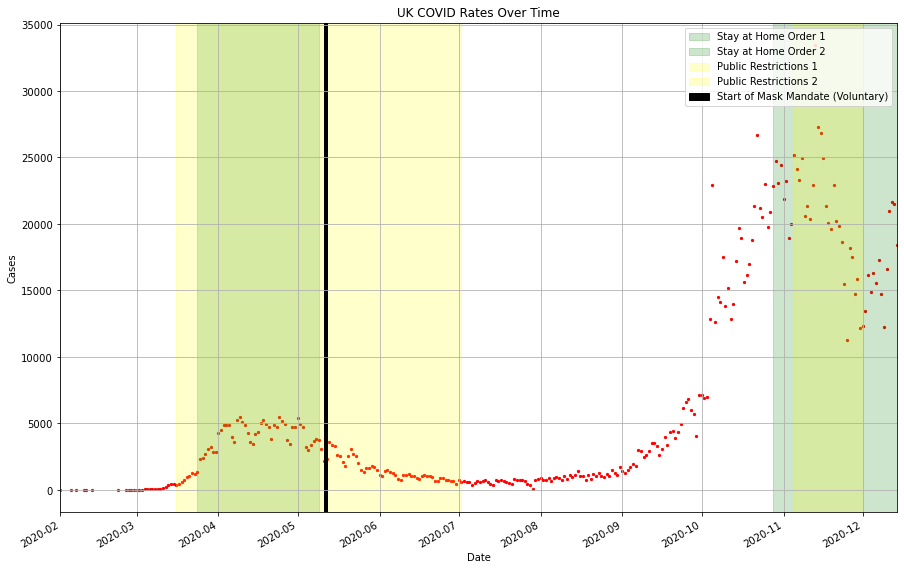

In [156]:
#setting x-axis to date whenever country == United_Kingdom
#set y-axis to cases whenver country == United_kingdom
ukDF = europe_df.loc[europe_df['Country']=='United_Kingdom']
x_axisUK = pd.to_datetime(ukDF['date'])
y_axisUK = ukDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots( figsize = (15,10))
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,5,9)),
           label="Stay at Home Order 1",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,10,28)), date2num(datetime(2020,12,14)),
           label="Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,7,2)),
           label="Public Restrictions 1",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,11,5)), date2num(datetime(2020,12,1)),
           label="Public Restrictions 2",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,11)), date2num(datetime(2020,5,12)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)

#Scatter plot and labeling axis labels
plt.scatter(x_axisUK, y_axisUK, s = 5, marker="o", color="red")
plt.title('UK COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsUK = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsUK)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisUK),max(x_axisUK))
plt.legend(loc='upper right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

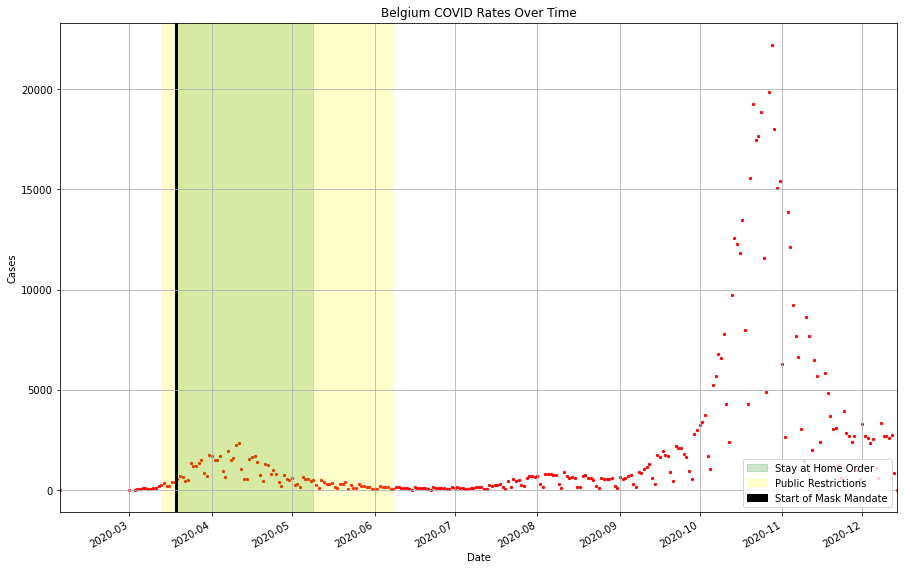

In [114]:
#setting x-axis to date whenever country == Belgium
#set y-axis to cases whenver country == Belgium
beDF = europe_df.loc[europe_df['Country']=='Belgium']
x_axisBE = pd.to_datetime(beDF['date'])
y_axisBE = beDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize= (15,10))
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,5,9)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,13)), date2num(datetime(2020,6,8)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,3,19)),
           label="Start of Mask Mandate",color="black", alpha=1)

#Scatter plat and labeling axis labels
plt.scatter(x_axisBE, y_axisBE, s = 5, marker="o", color="red")
plt.title('Belgium COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsBE = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsBE)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisBE),max(x_axisBE))
plt.legend( loc='lower right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

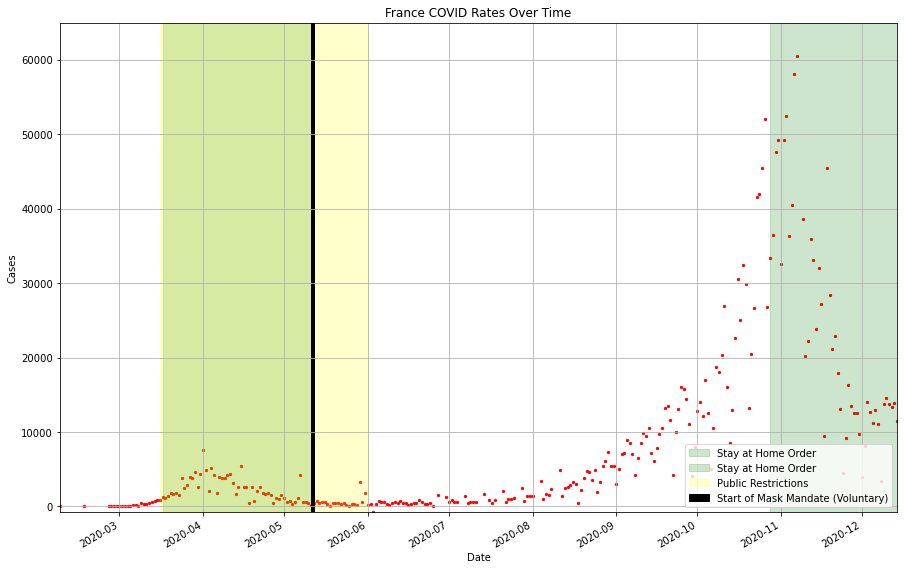

In [115]:
#setting x-axis to date whenever country == France
#set y-axis to cases whenver country == France
frDF = europe_df.loc[europe_df['Country']== 'France']
x_axisFR = pd.to_datetime(frDF['date'])
y_axisFR = frDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize = (15, 10))
ax.axvspan(date2num(datetime(2020,3,17)), date2num(datetime(2020,5,11)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,10,28)), date2num(datetime(2020,12,14)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,6,1)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,11)), date2num(datetime(2020,5,12)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)

#Scatter plot and labeling axis labels
plt.scatter(x_axisFR, y_axisFR, s = 5, marker="o", color="red")
plt.title('France COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsFR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsFR)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisFR),max(x_axisFR))
ax.set_ylim(min(y_axisFR), 65000)
plt.legend(loc='lower right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

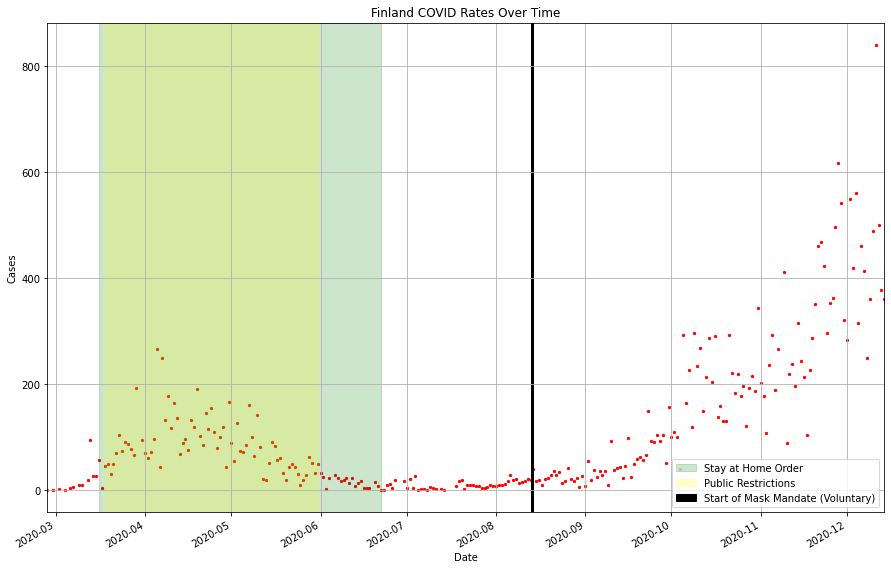

In [116]:
#setting x-axis to date whenever country == Finland
#set y-axis to cases whenver country == Finland
fiDF = europe_df.loc[europe_df['Country']=='Finland']
x_axisFI = pd.to_datetime(fiDF['date'])
y_axisFI = fiDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,6,22)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,5,31)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,8,13)), date2num(datetime(2020,8,14)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)

#Scatter plot and labeling axis labels
plt.scatter(x_axisFI, y_axisFI, s=5, marker="o", color="red")
plt.title('Finland COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsFI = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsFI)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisFI),max(x_axisFI))
plt.legend(loc = 'lower right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


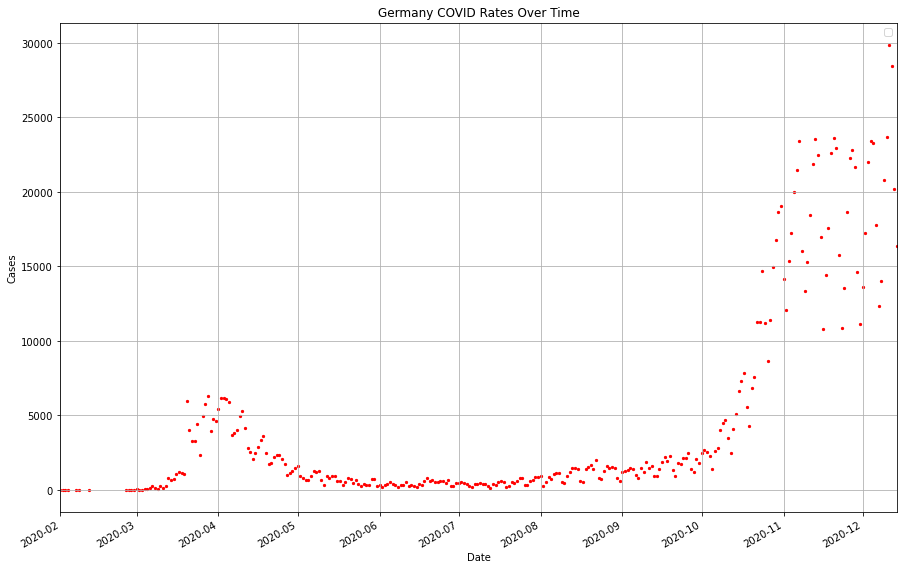

In [117]:
#setting x-axis to date whenever country == Germany
#set y-axis to cases whenver country == Germany
deDF = europe_df.loc[europe_df['Country']=='Germany']
x_axisDE = pd.to_datetime(deDF['date'])
y_axisDE = deDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize=(15,10))

#Scatter plot and labeling axis labels
plt.scatter(x_axisDE, y_axisDE, s = 5, marker="o", color="red")
plt.title('Germany COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsDE = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsDE)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisDE),max(x_axisDE))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

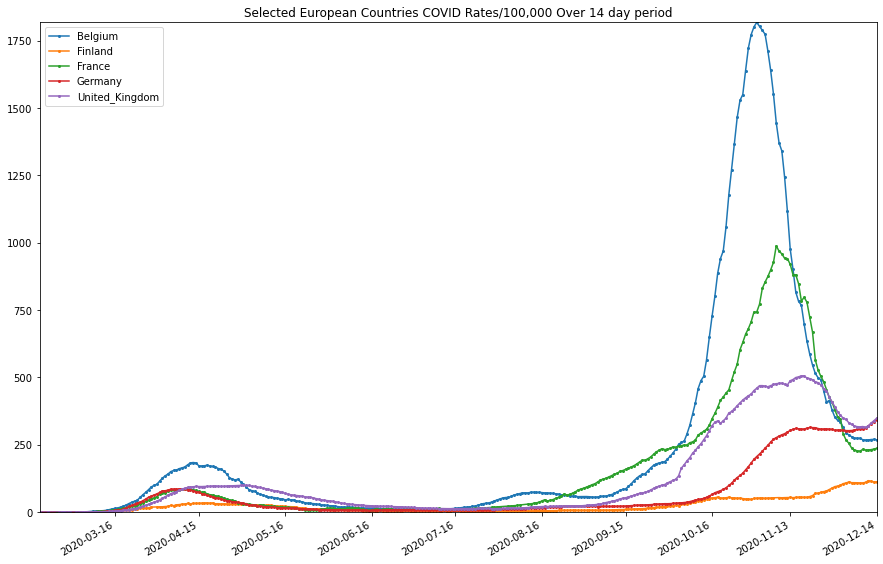

In [118]:
#Defining x and y axis
x_axis = europe_df['date']
y_axis = europe_df['14 day cases/100,000']

#Using a for loop to plot each country in Europe to the same graph
fig, ax = plt.subplots(figsize=(15, 10))
for name in europe_df['Country'].unique():
    plt.plot(europe_df[europe_df['Country'] == name]['date'], europe_df[europe_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)

#Setting months to the x axis
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)

#Labeling min and max for x axis as dates. Limiting y axis cases at 62000 because outliers
ax.set_xlim(min(x_axis),max(x_axis))
ax.set_ylim(min(y_axis), max(y_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
plt.title('Selected European Countries COVID Rates/100,000 Over 14 day period')
ax.legend(loc = 'upper left')

In [119]:
#Finding countries in Africa
africa_df["Country"].unique()

array(['Egypt', 'Ghana', 'Nigeria', 'South_Africa'], dtype=object)

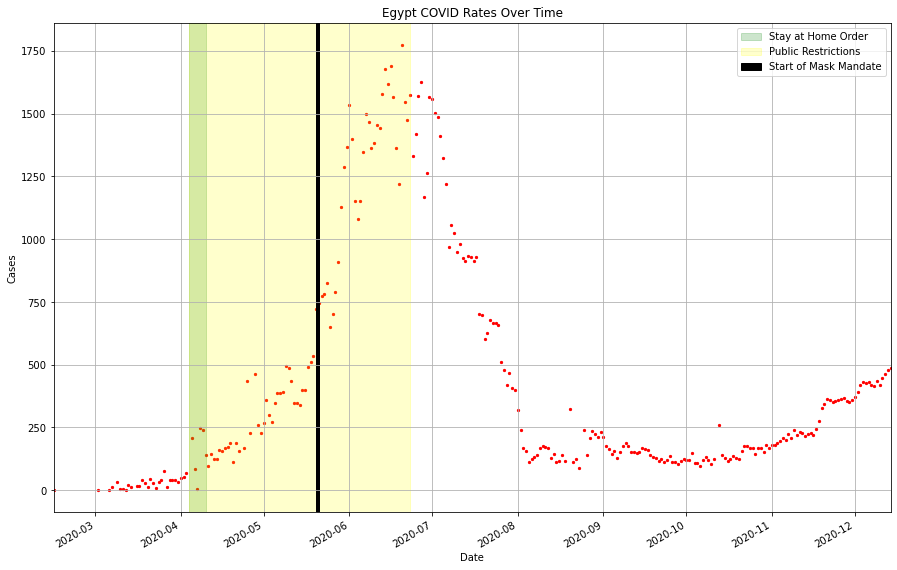

In [158]:
#setting x-axis to date whenever country == Egypt
#set y-axis to cases whenver country == Egypt
egDF = africa_df.loc[africa_df['Country']=='Egypt']
x_axisEG = pd.to_datetime(egDF['date'])
y_axisEG = egDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,4,4)), date2num(datetime(2020,4,10)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,4)), date2num(datetime(2020,6,23)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,20)), date2num(datetime(2020,5,21)),
           label="Start of Mask Mandate",color="black", alpha=1)

plt.scatter(x_axisEG, y_axisEG, s = 5, marker="o", color="red")
plt.title('Egypt COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsEG = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsEG)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisEG),max(x_axisEG))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

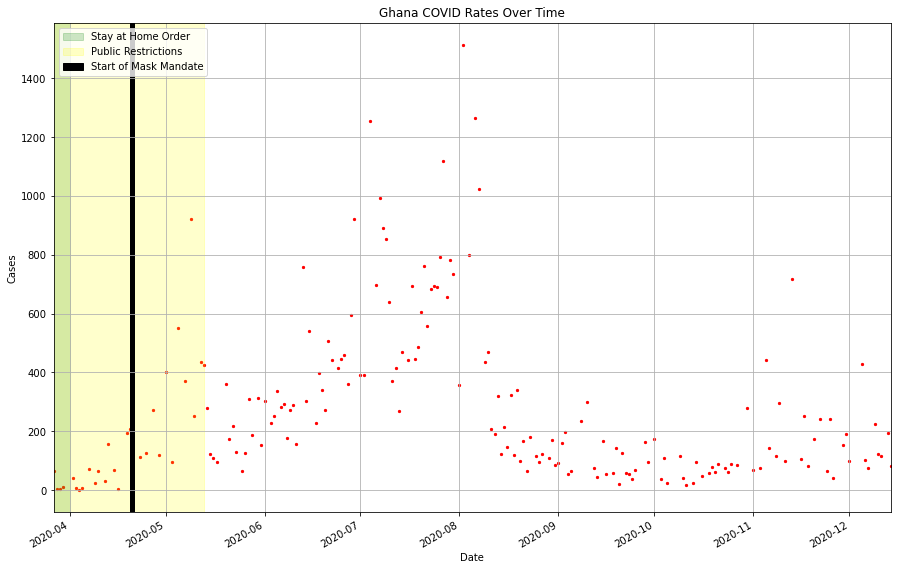

In [14]:
ghDF = africa_df.loc[africa_df['Country']=='Ghana']
x_axisGH = pd.to_datetime(ghDF['date'])
y_axisGH = ghDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,4,1)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,5,13)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,20)), date2num(datetime(2020,4,21)),
           label="Start of Mask Mandate",color="black", alpha=1)
plt.scatter(x_axisGH, y_axisGH, s = 5, marker="o", color="red")
plt.title('Ghana COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsGH = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsGH)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisGH),max(x_axisGH))
plt.legend(loc='upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

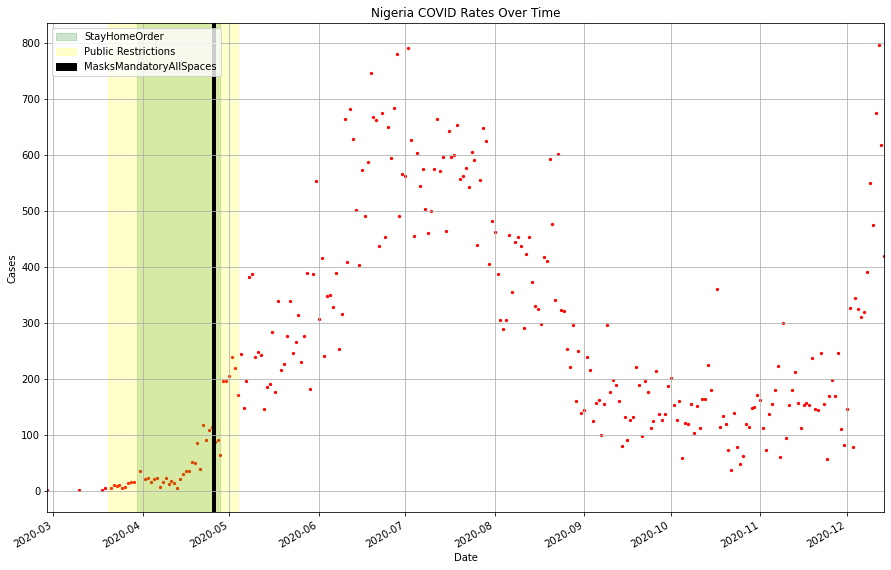

In [15]:
niDF = africa_df.loc[africa_df['Country']=='Nigeria']
x_axisNI = pd.to_datetime(niDF['date'])
y_axisNI = niDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,3,30)), date2num(datetime(2020,4,28)),
           label="StayHomeOrder",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,20)), date2num(datetime(2020,5,4)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,25)), date2num(datetime(2020,4,26)),
           label="MasksMandatoryAllSpaces",color="black", alpha=1)
plt.scatter(x_axisNI, y_axisNI, s = 5, marker="o", color="red")
plt.title('Nigeria COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsNI = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsNI)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisNI),max(x_axisNI))
plt.legend(loc = 'upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

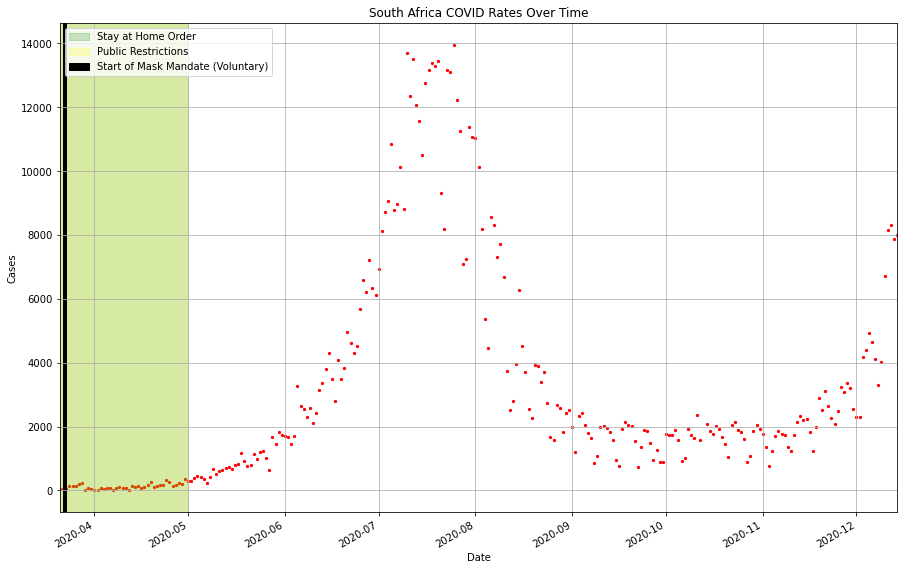

In [165]:
saDF = africa_df.loc[africa_df['Country']=='South_Africa']
x_axisSA = pd.to_datetime(saDF['date'])
y_axisSA = saDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,5,1)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,5,1)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,22)), date2num(datetime(2020,3,23)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)
plt.scatter(x_axisSA, y_axisSA, s = 5, marker="o", color="red")
plt.title('South Africa COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsSA = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsSA)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisSA),max(x_axisSA))
plt.legend(loc='upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

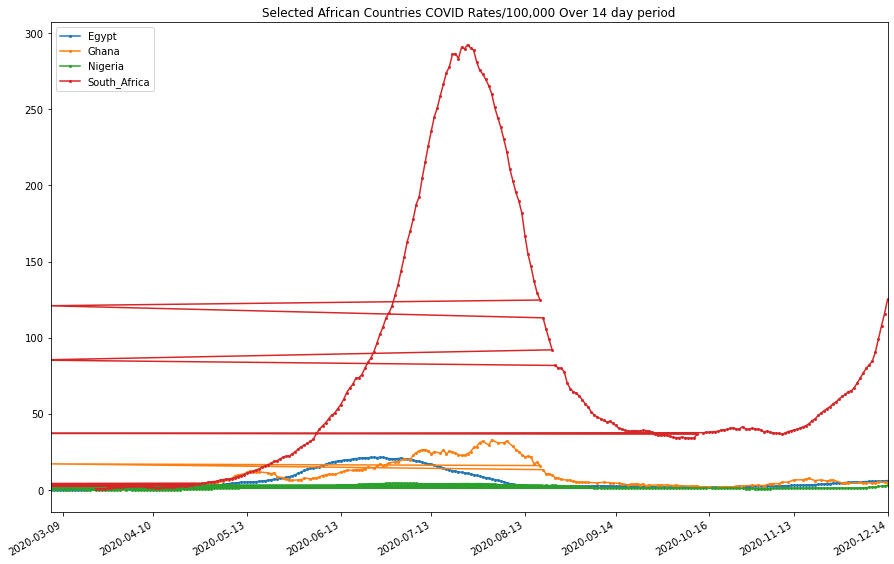

In [45]:
x_axis = africa_df['date']
y_axis = africa_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in africa_df['Country'].unique():
    plt.plot(africa_df[africa_df['Country'] == name]['date'], africa_df[africa_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
plt.title('Selected African Countries COVID Rates/100,000 Over 14 day period')
ax.legend(loc = 'upper left')

In [95]:
asia_df['Country'].unique()


array(['Iraq', 'Israel', 'Malaysia', 'Singapore', 'South_Korea',
       'Vietnam'], dtype=object)

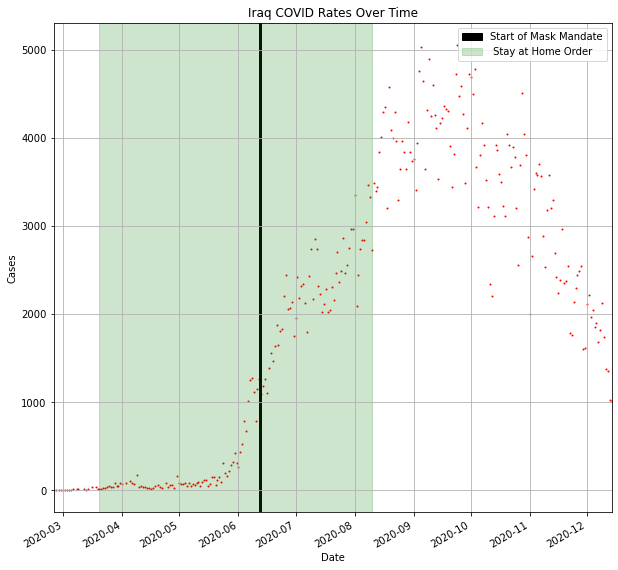

In [41]:
irDF = asia_df.loc[asia_df['Country']=='Iraq']
x_axisIR = pd.to_datetime(irDF['date'])
y_axisIR = irDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,6,12)), date2num(datetime(2020,6,13)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,3,20)), date2num(datetime(2020,8,10)),
           label=" Stay at Home Order",color="green", alpha=0.2)
plt.scatter(x_axisIR, y_axisIR, s = 5, marker="o", color="red")
plt.title('Iraq COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsIR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsIR)

ax.set_xlim(min(x_axisIR),max(x_axisIR))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

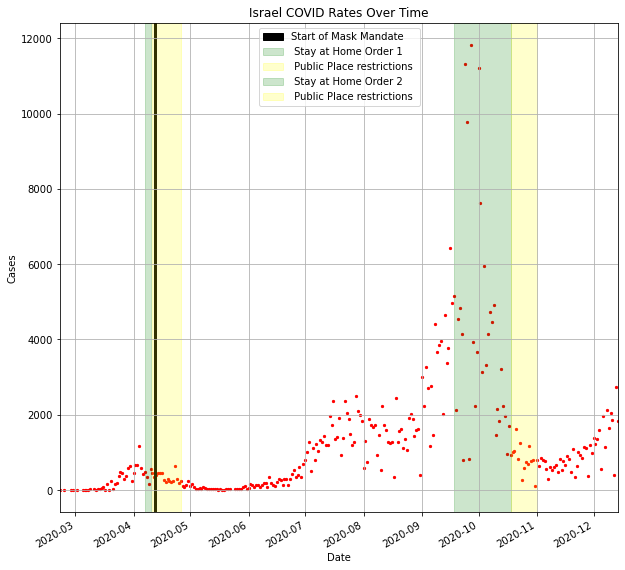

In [43]:
ilDF = asia_df.loc[asia_df['Country']=='Israel']
x_axisIL = pd.to_datetime(ilDF['date'])
y_axisIL = ilDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,4,12)), date2num(datetime(2020,4,13)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,4,7)), date2num(datetime(2020,4,10)),
           label=" Stay at Home Order 1",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,11)), date2num(datetime(2020,4,26)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,9,18)), date2num(datetime(2020,10,18)),
           label=" Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,10,18)), date2num(datetime(2020,11,1)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
plt.scatter(x_axisIL, y_axisIL, s = 5, marker="o", color="red")
plt.title('Israel COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsIL = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsIL)

ax.set_xlim(min(x_axisIL),max(x_axisIL))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

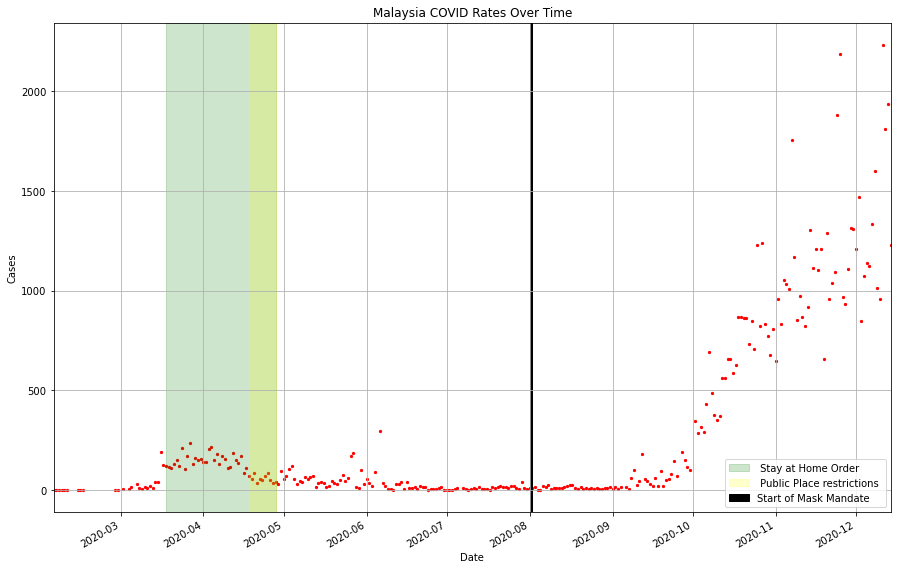

In [46]:
myDF = asia_df.loc[asia_df['Country']=='Malaysia']
x_axisMY = pd.to_datetime(myDF['date'])
y_axisMY = myDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,4,28)),
           label=" Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,18)), date2num(datetime(2020,4,28)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,8,1)), date2num(datetime(2020,8,2)),
           label="Start of Mask Mandate",color="black", alpha=1)

plt.scatter(x_axisMY, y_axisMY, s = 5, marker="o", color="red")
plt.title('Malaysia COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsMY = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsMY)

ax.set_xlim(min(x_axisMY),max(x_axisMY))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

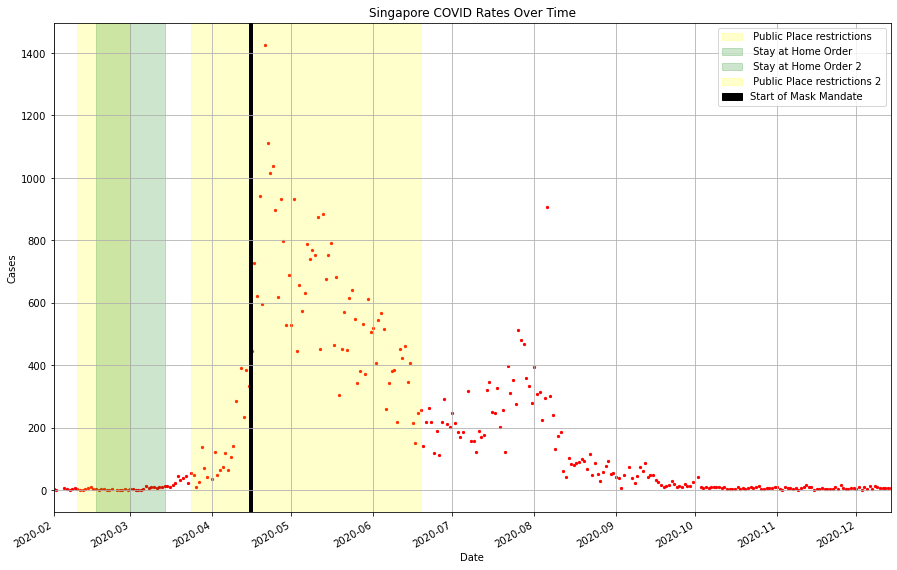

In [47]:
sgDF = asia_df.loc[asia_df['Country']=='Singapore']
x_axisSG = pd.to_datetime(sgDF['date'])
y_axisSG = sgDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,2,10)), date2num(datetime(2020,3,1)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,2,17)), date2num(datetime(2020,3,1)),
           label=" Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,1)), date2num(datetime(2020,3,14)),
           label=" Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,6,19)),
           label=" Public Place restrictions 2",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,15)), date2num(datetime(2020,4,16)),
           label="Start of Mask Mandate",color="black", alpha=1)

plt.scatter(x_axisSG, y_axisSG, s = 5, marker="o", color="red")
plt.title('Singapore COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsSG = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsSG)

ax.set_xlim(min(x_axisSG),max(x_axisSG))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

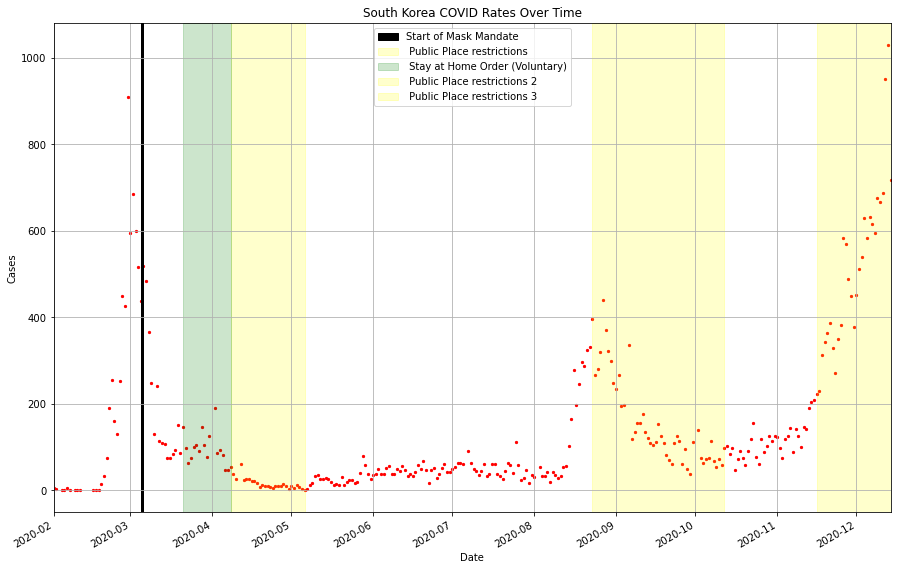

In [48]:
skDF = asia_df.loc[asia_df['Country']=='South_Korea']
x_axisSK = pd.to_datetime(skDF['date'])
y_axisSK = skDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,5)), date2num(datetime(2020,3,6)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,4,8)), date2num(datetime(2020,5,6)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,21)), date2num(datetime(2020,4,8)),
           label=" Stay at Home Order (Voluntary)",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,8,23)), date2num(datetime(2020,10,12)),
           label=" Public Place restrictions 2",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,11,16)), date2num(datetime(2020,12,31)),
           label=" Public Place restrictions 3",color="yellow", alpha=0.2)
plt.scatter(x_axisSK, y_axisSK, s = 5, marker="o", color="red")
plt.title('South Korea COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsSK = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsSK)

ax.set_xlim(min(x_axisSK),max(x_axisSK))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

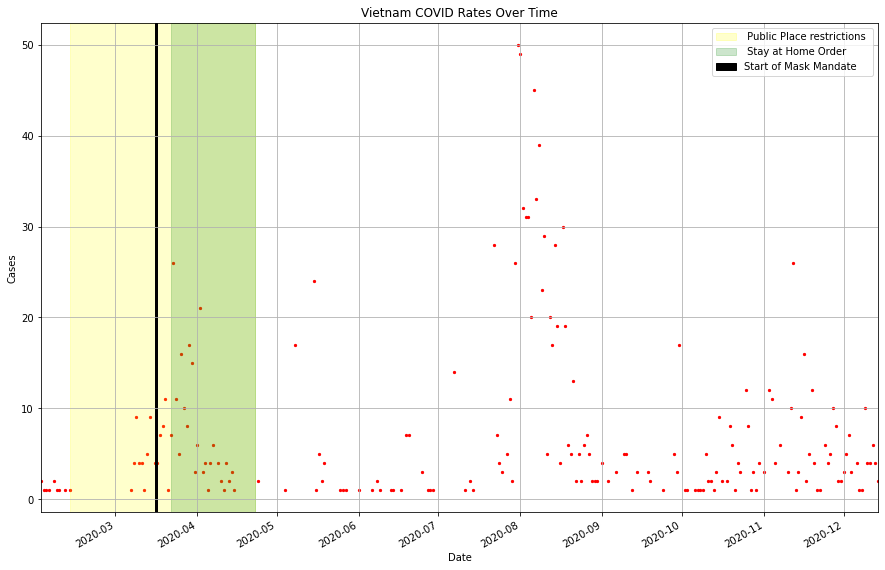

In [49]:
vtDF = asia_df.loc[asia_df['Country']=='Vietnam']
x_axisVT = pd.to_datetime(vtDF['date'])
y_axisVT = vtDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,2,13)), date2num(datetime(2020,4,23)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,22)), date2num(datetime(2020,4,23)),
           label=" Stay at Home Order ",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,3,17)),
           label="Start of Mask Mandate",color="black", alpha=1)

plt.scatter(x_axisVT, y_axisVT, s = 5, marker="o", color="red")
plt.title('Vietnam COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsVT = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsMY)

ax.set_xlim(min(x_axisVT),max(x_axisVT))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

In [25]:
vtDF.head()

,cases,deaths,Country,population,continent,"14 day cases/100,000",date
6147,2,0,Vietnam,96462108.0,Asia,0.055981,2020-12-14
6148,4,0,Vietnam,96462108.0,Asia,0.055981,2020-12-13
6149,6,0,Vietnam,96462108.0,Asia,0.053907,2020-12-12
6150,4,0,Vietnam,96462108.0,Asia,0.055981,2020-12-11
6151,4,0,Vietnam,96462108.0,Asia,0.062201,2020-12-10


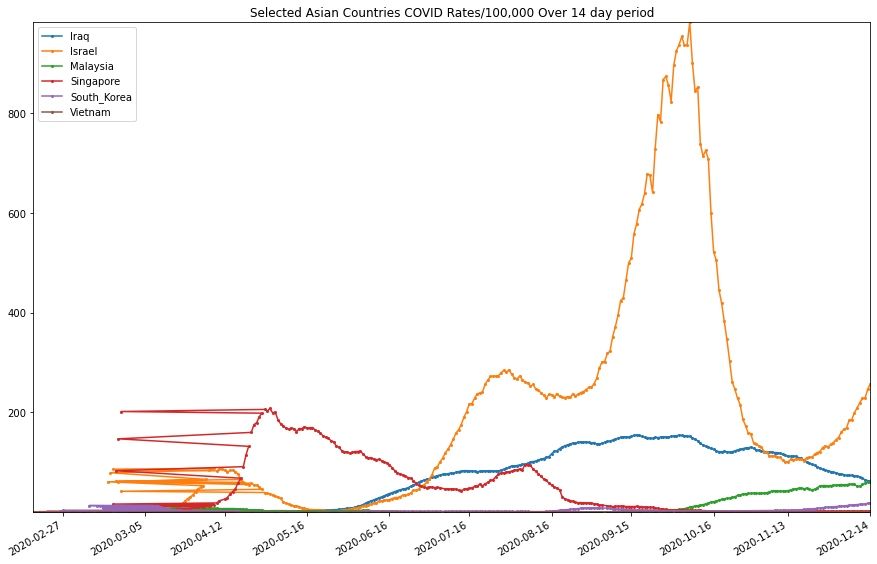

In [63]:
x_axis = asia_df['date']
y_axis = asia_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in asia_df['Country'].unique():
    plt.plot(asia_df[asia_df['Country'] == name]['date'], asia_df[asia_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
ax.set_ylim(min(y_axis), max(y_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
plt.title('Selected Asian Countries COVID Rates/100,000 Over 14 day period')
ax.legend(loc = 'upper left')

In [27]:
america_df['Country'].unique()

# plt.plot(asia_df[asia_df['Country'] == 'Singapore']['date'],asia_df[asia_df['Country'] == 'Singapore']['14 day cases/100,000'])

array(['Brazil', 'Canada', 'Chile', 'Dominican_Republic', 'Mexico',
       'United_States_of_America'], dtype=object)

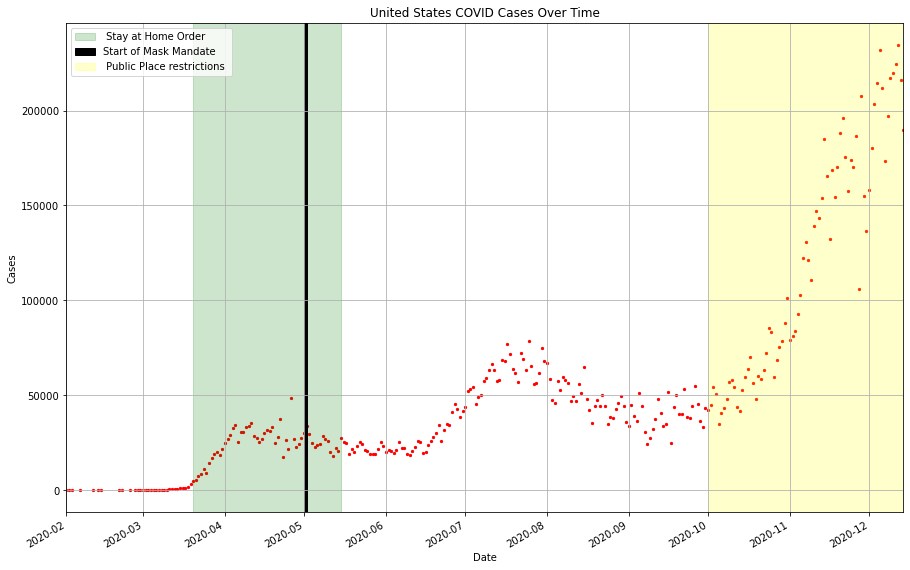

In [28]:
amDF = america_df.loc[america_df['Country']=='United_States_of_America']
x_axisAM = pd.to_datetime(amDF['date'])
y_axisAM = amDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,3,20)), date2num(datetime(2020,5,15)),
          label=" Stay at Home Order ",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,1)), date2num(datetime(2020,5,2)),
          label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,10,1)), date2num(datetime(2020,12,31)),
          label=" Public Place restrictions ",color="yellow", alpha=0.2)
plt.scatter(x_axisAM, y_axisAM, s = 5, marker="o", color="red")
plt.title('United States COVID Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsAM = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsAM)

ax.set_xlim(min(x_axisAM),max(x_axisAM))
plt.legend(loc= 'upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

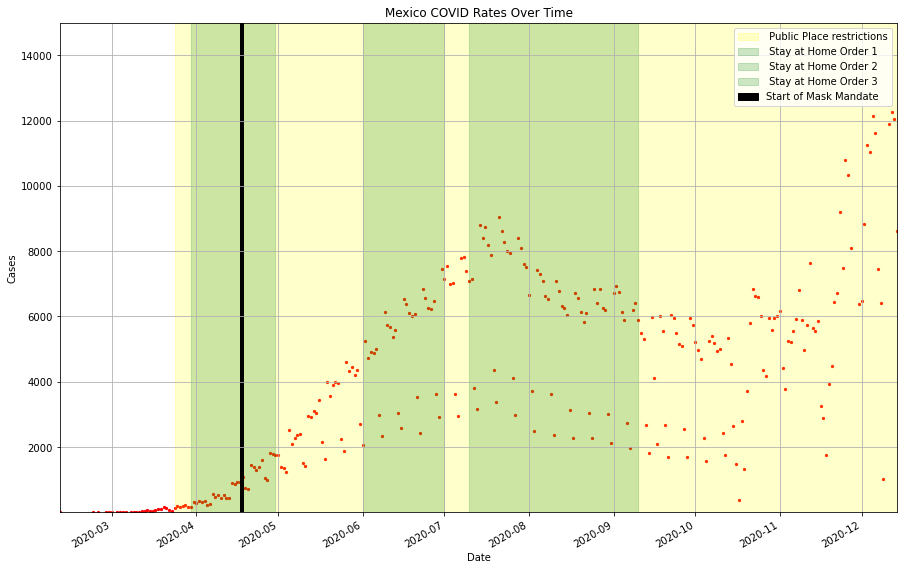

In [50]:
meDF = america_df.loc[america_df['Country']=='Mexico']
x_axisME = pd.to_datetime(meDF['date'])
y_axisME = meDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,12,31)),
           label=" Public Place restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,30)), date2num(datetime(2020,4,30)),
           label=" Stay at Home Order 1",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,6,1)), date2num(datetime(2020,7,1)),
           label=" Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,7,10)), date2num(datetime(2020,9,10)),
           label=" Stay at Home Order 3",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,17)), date2num(datetime(2020,4,18)),
           label="Start of Mask Mandate",color="black", alpha=1)

plt.scatter(x_axisME, y_axisME, s = 5, marker="o", color="red")
plt.title('Mexico COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsME = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsME)

ax.set_xlim(min(x_axisME),max(x_axisME))
ax.set_ylim(min(y_axisME),15000)
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

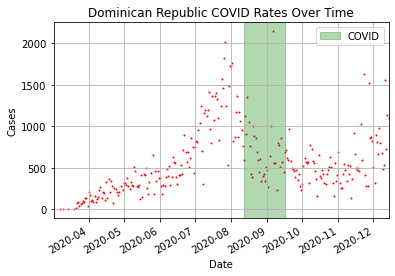

In [30]:
drDF = america_df.loc[america_df['Country']=='Dominican_Republic']
x_axisDR = pd.to_datetime(drDF['date'])
y_axisDR = drDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,8,12)), date2num(datetime(2020,9,16)), 
           label="COVID",color="green", alpha=0.3)
plt.scatter(x_axisDR, y_axisDR, s =5, marker="o", color="red")
plt.title('Dominican Republic COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsDR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsDR)

ax.set_xlim(min(x_axisDR),max(x_axisDR))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

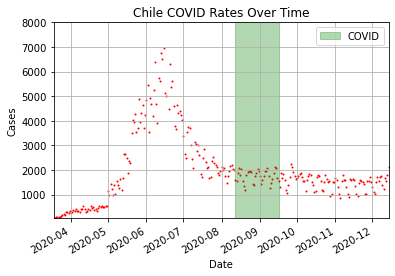

In [31]:
clDF = america_df.loc[america_df['Country']=='Chile']
x_axisCL = pd.to_datetime(clDF['date'])
y_axisCL = clDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,8,12)), date2num(datetime(2020,9,16)), 
           label="COVID",color="green", alpha=0.3)
plt.scatter(x_axisCL, y_axisCL, s = 5, marker="o", color="red")
plt.title('Chile COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsCL = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsCL)

ax.set_xlim(min(x_axisCL),max(x_axisCL))
ax.set_ylim(min(y_axisCL), 8000)
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

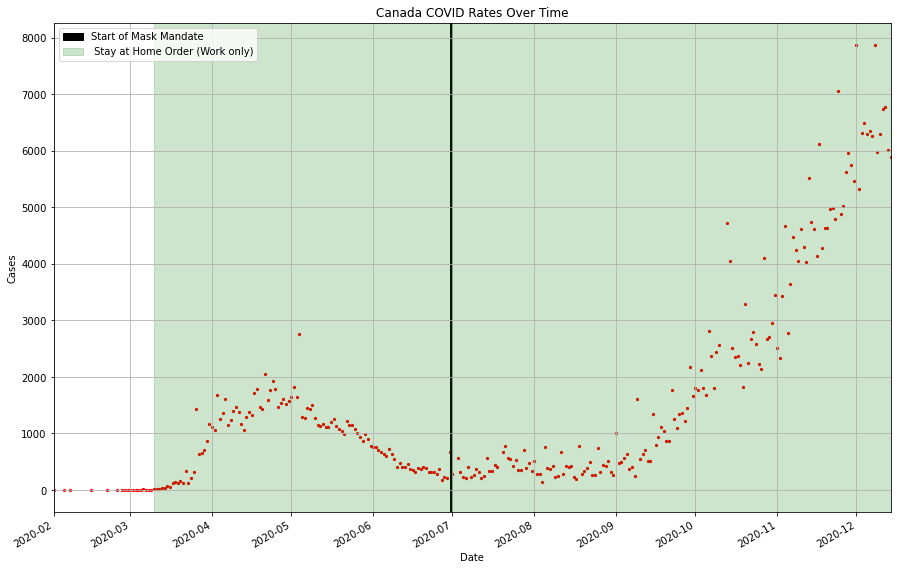

In [51]:
caDF = america_df.loc[america_df['Country']=='Canada']
x_axisCA = pd.to_datetime(caDF['date'])
y_axisCA = caDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,6,30)), date2num(datetime(2020,7,1)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,3,10)), date2num(datetime(2020,12,31)),
           label=" Stay at Home Order (Work only)",color="green", alpha=0.2)

plt.scatter(x_axisCA, y_axisCA, s = 5, marker="o", color="red")
plt.title('Canada COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsCA = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsCA)

ax.set_xlim(min(x_axisCA),max(x_axisCA))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

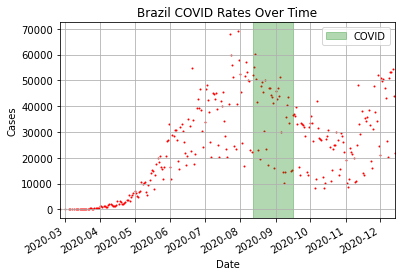

In [33]:
brDF = america_df.loc[america_df['Country']=='Brazil']
x_axisBR = pd.to_datetime(brDF['date'])
y_axisBR = brDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,8,12)), date2num(datetime(2020,9,16)), 
           label="COVID",color="green", alpha=0.3)
plt.scatter(x_axisBR, y_axisBR, s = 5, marker="o", color="red")
plt.title('Brazil COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsBR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsBR)

ax.set_xlim(min(x_axisBR),max(x_axisBR))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

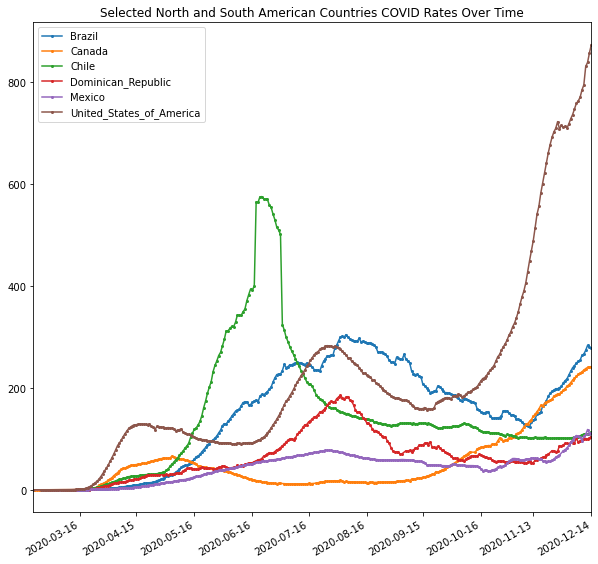

In [34]:
x_axis = america_df['date']
y_axis = america_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in america_df['Country'].unique():
    plt.plot(america_df[america_df['Country'] == name]['date'], america_df[america_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
plt.title('Selected North and South American Countries COVID Rates/100,000 Over 14 day period')
ax.legend(loc = 'upper left')

In [35]:
oceania_df['Country'].unique()

array(['Australia', 'New_Zealand'], dtype=object)

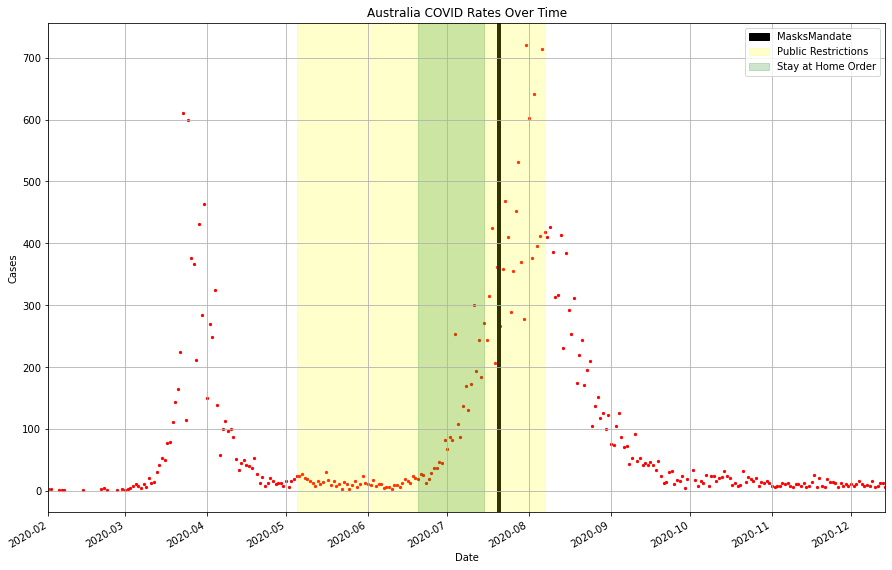

In [36]:
auDF = oceania_df.loc[oceania_df['Country']=='Australia']
x_axisAU = pd.to_datetime(auDF['date'])
y_axisAU = auDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,7,20)), date2num(datetime(2020,7,21)),
           label="MasksMandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,5,5)), date2num(datetime(2020,8,7)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,6,20)), date2num(datetime(2020,7,15)),
           label="Stay at Home Order",color="green", alpha=0.2)
plt.scatter(x_axisAU, y_axisAU, s = 5, marker="o", color="red")
plt.title('Australia COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsAU = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsAU)

ax.set_xlim(min(x_axisAU),max(x_axisAU))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


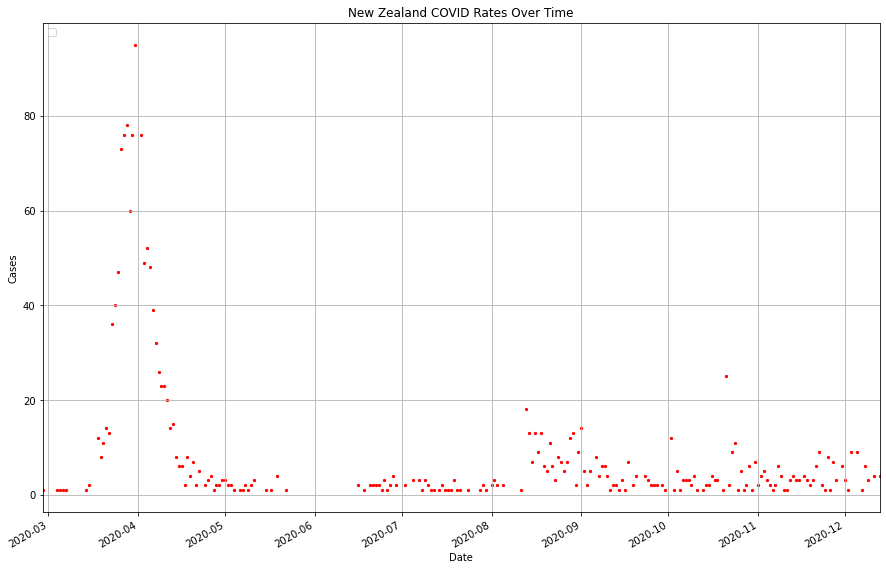

In [37]:
nzDF = oceania_df.loc[oceania_df['Country']=='New_Zealand']
x_axisNZ = pd.to_datetime(nzDF['date'])
y_axisNZ = nzDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x_axisNZ, y_axisNZ, s = 5, marker="o", color="red")


#Labeling x axis, y axis, and the title 
plt.title('New Zealand COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsNZ = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsNZ)

ax.set_xlim(min(x_axisNZ),max(x_axisNZ))
plt.legend(loc='upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()

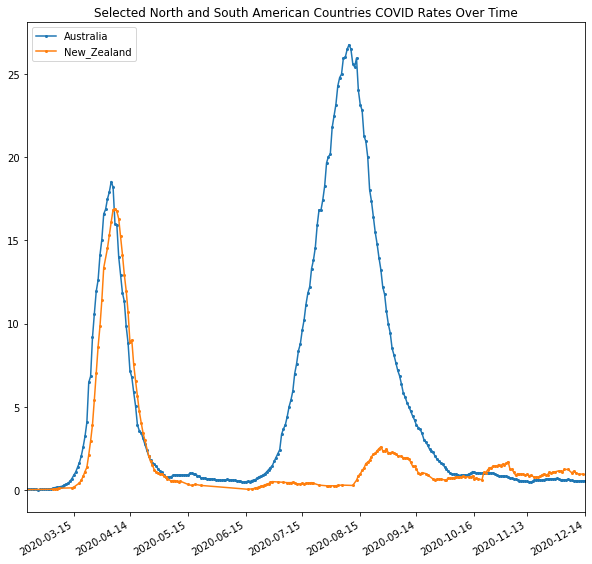

In [38]:
x_axis = oceania_df['date']
y_axis = oceania_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in oceania_df['Country'].unique():
    plt.plot(oceania_df[oceania_df['Country'] == name]['date'], oceania_df[oceania_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
plt.title('Australia and New Zealand COVID Rates/100,000 Over 14 day period')
ax.legend(loc = 'upper left')